<a href="https://colab.research.google.com/github/zzhining/python_ml_dl/blob/main/5_2_K_means_customer_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.2.K-means 알고리즘으로 군집생성하기

[데이터셋](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

- KMeans 알고리즘을 사용하여 고객 데이터의 클러스터를 생성

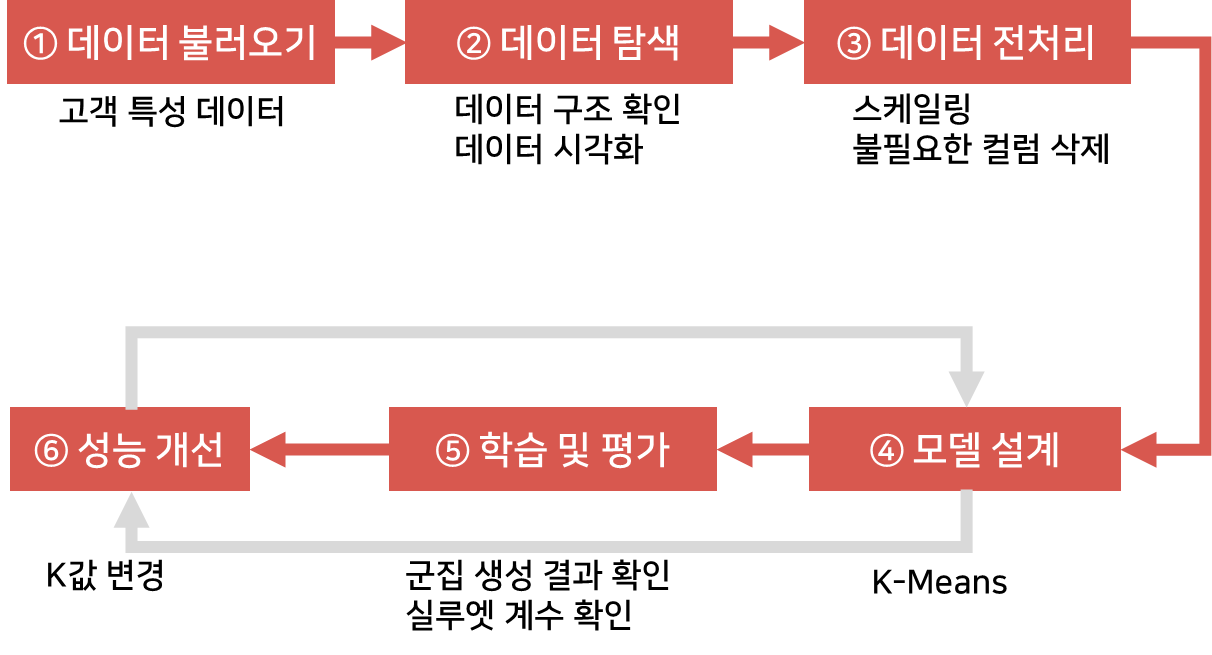

## 5.2.1 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/zzhining/ml_basic/main/dataset/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

## 5.2.2 데이터 탐색

----

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

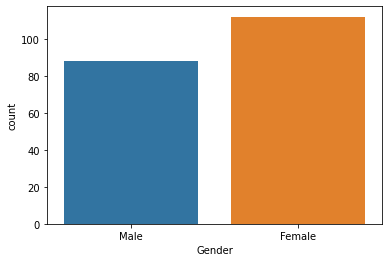

In [ ]:
sns.countplot(x=df['Gender'])

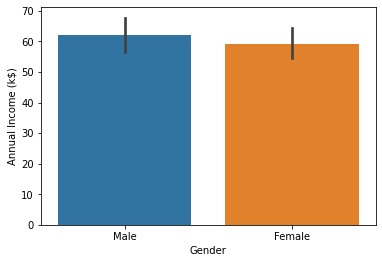

In [ ]:
sns.barplot(x= 'Gender',  y = 'Annual Income (k$)', data = df)

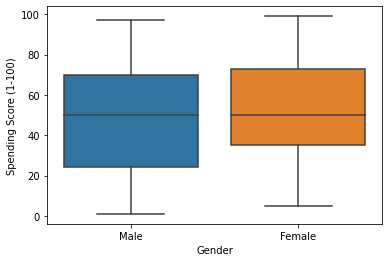

In [ ]:
sns.boxplot(x= 'Gender',  
            y = 'Spending Score (1-100)', 
            data = df)

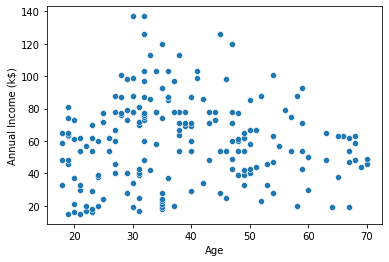

In [ ]:
sns.scatterplot(x= 'Age',  
                y = 'Annual Income (k$)', 
                data = df)

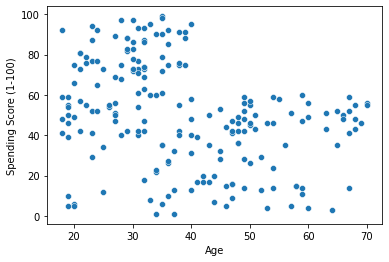

In [ ]:
sns.scatterplot(x= 'Age',  
                y = 'Spending Score (1-100)',
                data = df)

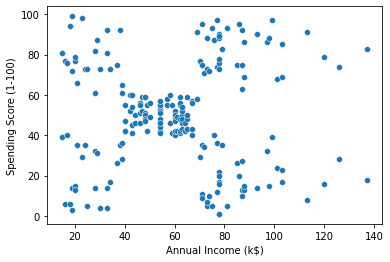

In [ ]:
sns.scatterplot(x= 'Annual Income (k$)', 
                y = 'Spending Score (1-100)', 
                data = df)

## 5.2.3 데이터 전처리
----

In [ ]:
# CustomerID 컬럼 삭제
df.drop(['CustomerID'], axis = 1,inplace = True)

In [ ]:
# Gender 컬럼 수치형 변수로 변경
df['Gender'] =df['Gender'].apply(lambda x : 0 if x =='Male' else 1)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [ ]:
# 스케일 변환
from sklearn.preprocessing import StandardScaler

X= df.iloc[:,1:]
sc = StandardScaler()
X = sc.fit_transform(X)

## 5.2.4 학습 - KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

model = KMeans(n_clusters= 2, random_state=42)
y_preds = model.fit_predict(X)
df['cluster'] = y_preds

print('실루엣 점수: {0:.4f}'.format(silhouette_score(X, y_preds))) 

실루엣 점수: 0.3355


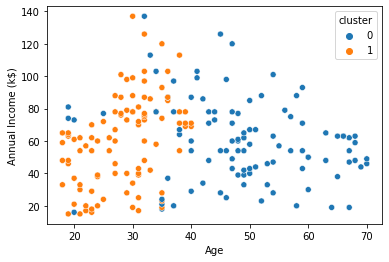

In [ ]:
sns.scatterplot(x= 'Age',  y = 'Annual Income (k$)', 
                data = df, hue = 'cluster')

## 5.2.5 최적의 군집 수 찾기
----
   

In [ ]:
silhouette_avg = []
for k in range(10):
    model = KMeans(n_clusters= k+2, random_state=42)
    y_preds = model.fit_predict(X)
    score = silhouette_score(X, y_preds)
    silhouette_avg.append(score)
    print("군집개수: {0}개, 평균 실루엣 점수: {1:.4f}"
    .format(k+2, score))

군집개수: 2개, 평균 실루엣 점수: 0.3355
군집개수: 3개, 평균 실루엣 점수: 0.3578
군집개수: 4개, 평균 실루엣 점수: 0.4040
군집개수: 5개, 평균 실루엣 점수: 0.4166
군집개수: 6개, 평균 실루엣 점수: 0.4284
군집개수: 7개, 평균 실루엣 점수: 0.4112
군집개수: 8개, 평균 실루엣 점수: 0.4084
군집개수: 9개, 평균 실루엣 점수: 0.4201
군집개수: 10개, 평균 실루엣 점수: 0.4226
군집개수: 11개, 평균 실루엣 점수: 0.4037


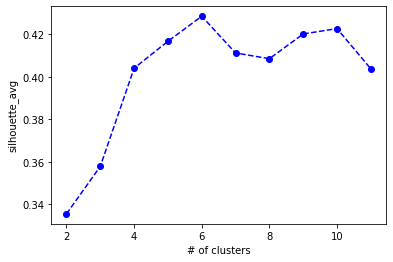

In [ ]:
plt.plot(range(2,12), silhouette_avg, 'bo--')
plt.xlabel('# of clusters')
plt.ylabel('silhouette_avg')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

def plotSilhouette(n_clusters, y_preds):   
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 6)
    y_lower = 10
    silhouette_avg = silhouette_score(X, y_preds)   
    sample_silhouette_values = silhouette_samples(X, y_preds)
    print("군집개수: {0}개, 평균 실루엣 점수: {1:.4f}".format(k, silhouette_avg))

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[y_preds == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the {0} clusters.".format(n_clusters))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

군집개수: 4개, 평균 실루엣 점수: 0.4040


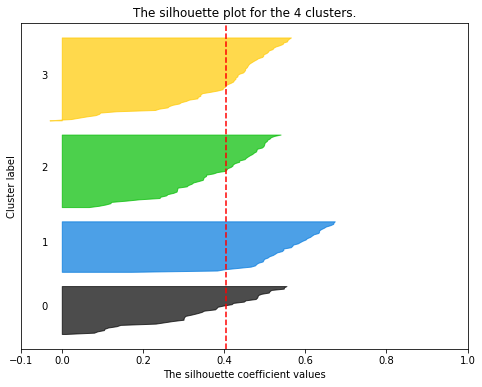

군집개수: 5개, 평균 실루엣 점수: 0.4166


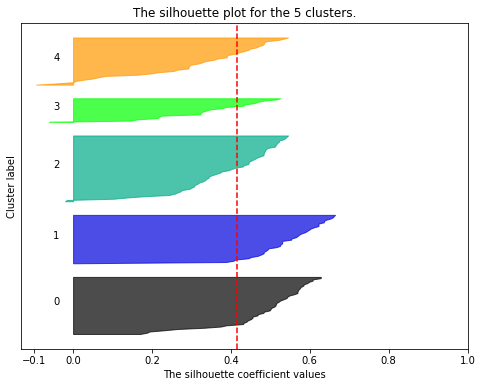

군집개수: 6개, 평균 실루엣 점수: 0.4284


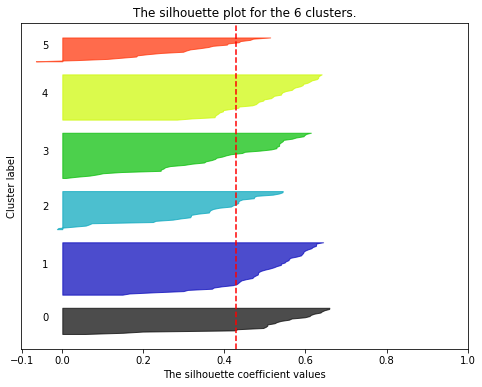

In [ ]:
import matplotlib.cm as cm
k_list = [4, 5, 6]

for k in k_list:
    model = KMeans(n_clusters= k, random_state=42)
    y_preds = model.fit_predict(X)
    plotSilhouette(k, y_preds)

In [ ]:
model = KMeans(n_clusters= 6, random_state=42)
y_preds = model.fit_predict(X)
df['cluster'] = y_preds

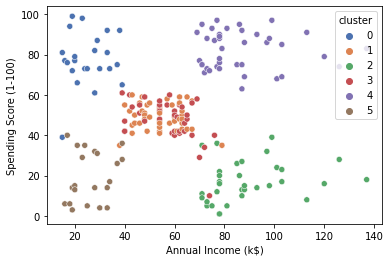

In [ ]:
sns.scatterplot(x = 'Annual Income (k$)',
                y = 'Spending Score (1-100)', 
                data = df, hue = 'cluster', 
                palette="deep")

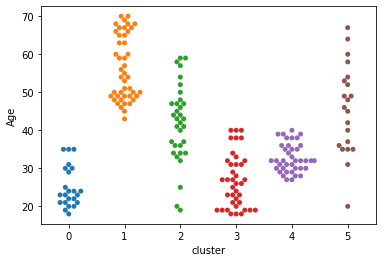

In [ ]:
sns.swarmplot(x = 'cluster', y='Age', data = df)

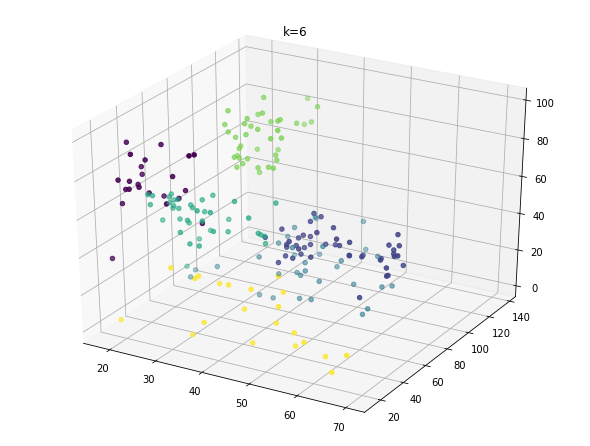

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3D(x, y, z, category, title) :
    axes3d = Axes3D(plt.figure(figsize=(8, 6))) 
    axes3d.scatter(xs = x, ys = y, zs = z, c = category)
    axes3d.set_title(title)

plot3D(df[df.columns[1]], df[df.columns[2]], 
       df[df.columns[3]], df['cluster'], 'k=6')